In [1]:
import numpy as np
import statsmodels.stats.multitest as smm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [2]:
# VCF data is the combined data (bed/bim/fam) for chromosome 22
vcf_file_path = '1000G.EUR.22.vcf'

header_line = None

# Read data in
with open(vcf_file_path, 'r') as vcf:
    for line in vcf:
        if line.startswith('#'):
            if line.startswith('##'):
                continue
            else:
                header_line = line.strip()
                break

if header_line:
    header_columns = header_line.strip('#').split('\t')
    vcf_data = pd.read_csv(vcf_file_path, delimiter='\t', names=header_columns, comment='#')

vcf_data

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00096_HG00096,...,NA20814_NA20814,NA20815_NA20815,NA20818_NA20818,NA20819_NA20819,NA20821_NA20821,NA20822_NA20822,NA20826_NA20826,NA20827_NA20827,NA20828_NA20828,NA20832_NA20832
0,22,16061016,rs9617528,T,C,.,.,PR,GT,0/0,...,0/1,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/1,0/0
1,22,16504399,rs4911642,T,C,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/1
2,22,16886873,rs7287144,A,G,.,.,PR,GT,0/1,...,0/1,0/1,0/1,0/1,0/0,0/0,0/1,0/1,0/0,0/1
3,22,16892858,rs5748662,G,A,.,.,PR,GT,0/1,...,0/0,0/1,0/1,0/1,0/0,0/0,0/1,0/0,0/0,0/1
4,22,16894090,rs5994034,C,T,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/1,0/0,1/1,0/1,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17484,22,51181759,rs13056621,G,A,.,.,PR,GT,0/1,...,0/0,0/0,0/0,0/1,0/0,0/0,0/1,0/0,0/0,0/0
17485,22,51186228,rs3865766,C,T,.,.,PR,GT,0/1,...,0/1,0/1,1/1,0/1,0/0,0/0,0/1,0/1,0/0,1/1
17486,22,51211392,rs3888396,T,C,.,.,PR,GT,0/1,...,0/0,0/1,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/0
17487,22,51212875,rs2238837,A,C,.,.,PR,GT,0/1,...,0/1,0/1,0/1,0/1,0/0,0/1,0/1,0/1,0/0,0/0


In [3]:
# Set index for vcf data as ID
vcf_data = vcf_data.set_index('ID')
vcf_data

,CHROM,POS,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00096_HG00096,HG00097_HG00097,...,NA20814_NA20814,NA20815_NA20815,NA20818_NA20818,NA20819_NA20819,NA20821_NA20821,NA20822_NA20822,NA20826_NA20826,NA20827_NA20827,NA20828_NA20828,NA20832_NA20832
ID,,,,,,,,,,,,,,,,,,,,,
rs9617528,22,16061016,T,C,.,.,PR,GT,0/0,0/0,...,0/1,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/1,0/0
rs4911642,22,16504399,T,C,.,.,PR,GT,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/1
rs7287144,22,16886873,A,G,.,.,PR,GT,0/1,0/0,...,0/1,0/1,0/1,0/1,0/0,0/0,0/1,0/1,0/0,0/1
rs5748662,22,16892858,G,A,.,.,PR,GT,0/1,0/0,...,0/0,0/1,0/1,0/1,0/0,0/0,0/1,0/0,0/0,0/1
rs5994034,22,16894090,C,T,.,.,PR,GT,0/0,0/1,...,0/0,0/0,0/0,0/0,0/0,0/1,0/0,1/1,0/1,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs13056621,22,51181759,G,A,.,.,PR,GT,0/1,0/1,...,0/0,0/0,0/0,0/1,0/0,0/0,0/1,0/0,0/0,0/0
rs3865766,22,51186228,C,T,.,.,PR,GT,0/1,0/1,...,0/1,0/1,1/1,0/1,0/0,0/0,0/1,0/1,0/0,1/1
rs3888396,22,51211392,T,C,.,.,PR,GT,0/1,0/0,...,0/0,0/1,0/0,0/0,0/0,0/0,0/1,0/0,0/1,0/0


In [4]:
# Method to transform data to numeric format
# '0/0' -> 0, '0/1' -> 1, '1/1' -> 2
def genotype_to_numeric(genotype_str):
    if genotype_str == "0/0":
        return 0
    elif genotype_str == "0/1":
        return 1
    elif genotype_str == "1/1":
        return 2
    else:
        return None

In [5]:
gene_data = pd.read_csv('1000G.EUR.22.vcf', sep="\t", comment='#')
# Convert genotypes to numeric using function
for col in gene_data.columns[9:]:
    gene_data[col] = gene_data[col].apply(genotype_to_numeric)
gene_data

,22,16061016,rs9617528,T,C,.,..1,PR,GT,0/0,...,0/1.202,0/0.253,0/0.254,0/0.255,0/0.256,0/0.257,1/1.24,0/0.258,0/1.203,0/0.259
0,22,16504399,rs4911642,T,C,.,.,PR,GT,0,...,0,0,0,0,0,0,1,0,1,1
1,22,16886873,rs7287144,A,G,.,.,PR,GT,1,...,1,1,1,1,0,0,1,1,0,1
2,22,16892858,rs5748662,G,A,.,.,PR,GT,1,...,0,1,1,1,0,0,1,0,0,1
3,22,16894090,rs5994034,C,T,.,.,PR,GT,0,...,0,0,0,0,0,1,0,2,1,0
4,22,16894264,rs4010554,C,A,.,.,PR,GT,1,...,2,1,1,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17483,22,51181759,rs13056621,G,A,.,.,PR,GT,1,...,0,0,0,1,0,0,1,0,0,0
17484,22,51186228,rs3865766,C,T,.,.,PR,GT,1,...,1,1,2,1,0,0,1,1,0,2
17485,22,51211392,rs3888396,T,C,.,.,PR,GT,1,...,0,1,0,0,0,0,1,0,1,0
17486,22,51212875,rs2238837,A,C,.,.,PR,GT,1,...,1,1,1,1,0,1,1,1,0,0


In [6]:
# Gene expression data
exp_data = pd.read_csv("GD462.GeneQuantRPKM.50FN.samplename.resk10.txt", sep="\t", index_col=[0,1,2,3])
exp_data

,,,,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
TargetID,Gene_Symbol,Chr,Coord,,,,,,,,,,,,,,,,,,,,,
ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.101858,0.078110,0.048981,0.118597,0.004035,0.010925,-0.000901,-0.006706,0.098863,0.045285,...,0.088601,0.240010,0.137175,0.148494,0.038643,0.088509,0.029204,0.024423,0.044816,0.139186
ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.183805,5.686911,2.434653,3.830894,6.612288,4.709646,7.348876,8.180940,8.721889,8.169477,...,13.428205,6.094500,12.536000,2.217262,3.573394,7.583364,4.052882,1.570378,4.900372,6.737308
ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.199910,1.573572,0.521616,1.447225,3.565791,1.982681,0.675305,3.817395,2.561376,1.231049,...,3.225880,1.996067,2.854923,2.267343,1.331201,2.187895,1.004250,3.003316,1.984362,1.684954
ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831940,0.069778,0.931086,0.620941,1.660668,0.570481,1.259393,0.734784,1.479124,1.548653,...,1.023381,1.127852,0.774409,1.495854,0.895342,1.513521,0.826377,1.021201,0.952502,0.740565
ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,27.881116,27.194117,28.579857,27.226416,...,25.079490,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.582832,34.071123,19.394365,37.523721,33.430473,37.844966,35.843048,40.455377,32.287466,37.636318,...,47.905182,33.224977,39.827675,27.096811,34.686342,37.386766,30.598840,33.516674,32.017940,38.341888
ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054749,14.477899,11.584425,12.637956,12.015089,13.750655,15.690696,11.798242,15.461657,18.126433,...,11.723462,9.900372,10.473115,13.433413,15.832594,19.216176,10.213739,14.563192,15.637732,8.357117
ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.112114,0.831797,0.253228,0.271568,0.486086,1.362640,1.543528,0.535700,0.900239,0.929809,...,1.168991,0.645389,0.819469,0.515448,0.463054,1.580658,0.701396,0.771233,0.857330,0.703369


In [7]:
# Set index as just 'Gene_Symbol'
exp_data_reset = exp_data.reset_index()
exp_data_reset = exp_data_reset.set_index('Gene_Symbol')
exp_data_reset = exp_data_reset[exp_data_reset['Chr'] == '22']
exp_data_reset

,TargetID,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
ENSG00000249263.2,ENSG00000249263.2,22,17140518,0.340656,0.318942,-0.009145,0.231503,0.089713,0.482984,0.194261,...,0.032117,0.213629,0.225474,0.134216,0.128749,0.060841,0.298061,-0.011292,0.058276,-0.013384
ENSG00000224688.1,ENSG00000224688.1,22,21496660,4.194827,3.369440,2.335470,4.477910,3.641758,3.296741,5.374857,...,4.669164,3.918440,4.977372,3.253683,3.322997,6.613617,3.438039,3.768840,3.248447,4.300825
ENSG00000075240.12,ENSG00000075240.12,22,46971909,3.531803,3.635541,1.251434,3.007745,3.574070,4.569758,4.974080,...,4.057426,3.736969,3.156168,6.785470,5.646243,2.418243,4.678466,4.626435,5.101994,4.100622
ENSG00000099937.6,ENSG00000099937.6,22,21128167,0.519054,0.399216,0.078965,0.145628,0.446993,0.217271,0.524480,...,0.621082,0.414906,1.047612,0.353794,0.253339,0.492650,0.449070,0.081118,0.164197,0.287428
ENSG00000099998.12,ENSG00000099998.12,22,24641110,0.073630,0.041109,0.017493,-0.020552,0.000059,-0.007782,0.027476,...,0.045730,0.003584,0.027056,0.007583,0.063843,0.059052,-0.008820,0.017421,0.010471,0.105646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000100121.8,ENSG00000100121.8,22,22988780,2.198850,2.083065,1.996587,2.239116,3.570457,4.731377,3.247880,...,4.254171,3.959983,6.706213,4.905286,4.190235,2.707226,4.337316,3.922871,4.006087,1.814178
ENSG00000099958.10,ENSG00000099958.10,22,24181315,7.977406,9.358290,4.416089,7.388032,9.040660,3.006184,6.473103,...,5.593587,9.125373,8.040828,23.925241,4.978087,10.765797,8.942371,11.637476,5.709065,5.991736
ENSG00000233360.2,ENSG00000233360.2,22,38054384,0.331823,0.596443,0.249310,0.555526,0.512440,0.406920,0.714013,...,0.698186,0.480949,0.618142,0.685900,0.562676,0.720030,0.509328,0.625647,0.350221,0.690760


In [8]:
# Fix column name formatting
vcf_data.columns = vcf_data.columns.str.split('_').str[0]

# Split between metadata and individuals, since individuals are labeled on the columns
metadata_columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT']
individual_columns = vcf_data.columns.difference(metadata_columns)

# Fix column names for individuals
df_snps = vcf_data.rename(columns={col: col.split('_')[0] for col in individual_columns})

# Common individuals between the dataframes
common_individuals = df_snps.columns.intersection(exp_data.columns)

# Combine dataframes to only include common individuals (inner join)
df_snps_common = df_snps.reindex(columns=common_individuals, fill_value=0)

# Save the coordinate and gene position columns
coord_column = exp_data_reset['Coord']
pos_column = vcf_data['POS']

# Apply data transformation
df_snps_numeric = df_snps_common.applymap(genotype_to_numeric)
df_snps_numeric

,HG00096,HG00097,HG00099,HG00101,HG00102,HG00103,HG00105,HG00108,HG00109,HG00110,...,NA20809,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20819,NA20826,NA20828
ID,,,,,,,,,,,,,,,,,,,,,
rs9617528,0,0,0,1,0,0,0,2,0,1,...,0,0,1,0,1,1,0,0,2,1
rs4911642,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
rs7287144,1,0,1,1,1,1,0,0,1,1,...,1,1,0,2,0,1,1,1,1,0
rs5748662,1,0,1,2,1,1,0,0,1,1,...,1,1,0,2,0,0,1,1,1,0
rs5994034,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs13056621,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
rs3865766,1,1,1,2,0,1,0,1,1,1,...,2,2,2,0,1,1,1,1,1,0
rs3888396,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,1


In [9]:
# Reset index, only include common individuals
df_expression_common = exp_data_reset.reindex(columns=common_individuals, fill_value=0)
df_expression_common

,HG00096,HG00097,HG00099,HG00101,HG00102,HG00103,HG00105,HG00108,HG00109,HG00110,...,NA20809,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20819,NA20826,NA20828
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
ENSG00000249263.2,0.340656,0.318942,-0.009145,0.089713,0.482984,0.194261,0.498441,0.201539,0.243056,0.008683,...,0.555108,0.032117,0.213629,0.225474,0.134216,0.128749,0.060841,-0.011292,0.058276,-0.013384
ENSG00000224688.1,4.194827,3.369440,2.335470,3.641758,3.296741,5.374857,3.781409,3.932262,2.681025,4.497243,...,4.394066,4.669164,3.918440,4.977372,3.253683,3.322997,6.613617,3.768840,3.248447,4.300825
ENSG00000075240.12,3.531803,3.635541,1.251434,3.574070,4.569758,4.974080,4.611527,5.279322,5.287192,4.424207,...,4.823937,4.057426,3.736969,3.156168,6.785470,5.646243,2.418243,4.626435,5.101994,4.100622
ENSG00000099937.6,0.519054,0.399216,0.078965,0.446993,0.217271,0.524480,0.378788,0.434441,0.094880,0.124307,...,0.250724,0.621082,0.414906,1.047612,0.353794,0.253339,0.492650,0.081118,0.164197,0.287428
ENSG00000099998.12,0.073630,0.041109,0.017493,0.000059,-0.007782,0.027476,0.043353,0.019215,0.094445,0.006079,...,0.002682,0.045730,0.003584,0.027056,0.007583,0.063843,0.059052,0.017421,0.010471,0.105646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000100121.8,2.198850,2.083065,1.996587,3.570457,4.731377,3.247880,2.567277,2.108914,1.837027,3.077938,...,2.300266,4.254171,3.959983,6.706213,4.905286,4.190235,2.707226,3.922871,4.006087,1.814178
ENSG00000099958.10,7.977406,9.358290,4.416089,9.040660,3.006184,6.473103,5.029296,13.062947,6.143417,4.170589,...,14.258994,5.593587,9.125373,8.040828,23.925241,4.978087,10.765797,11.637476,5.709065,5.991736
ENSG00000233360.2,0.331823,0.596443,0.249310,0.512440,0.406920,0.714013,0.744332,0.460835,0.493557,0.454184,...,0.348969,0.698186,0.480949,0.618142,0.685900,0.562676,0.720030,0.625647,0.350221,0.690760


In [10]:
# Select the first 200 rows for example
# Data takes a while to run for the entire dataset
df_expression_demo = df_expression_common.iloc[:200, :]
df_snps_demo = df_snps_numeric.iloc[:200]

# Results dataframe
results = pd.DataFrame(index=df_expression_demo.index, columns=df_snps_demo.index)

# eQTL analysis
for gene in df_expression_demo.index:
    gene_expression_data = df_expression_demo.loc[gene].reset_index(drop=True)
    
    for snp in df_snps_demo.index:
        X = sm.add_constant(np.array(df_snps_demo.loc[snp]))
        Y = np.array(gene_expression_data)
        
        model = sm.OLS(gene_expression_data, X).fit()
        results.at[gene, snp] = model.pvalues[1]

results

ID,rs9617528,rs4911642,rs7287144,rs5748662,rs5994034,rs4010554,rs4010558,rs3954571,rs11089179,rs9604821,...,rs2399168,rs2908526,rs5748829,rs928831,rs2845394,rs2845393,rs881623,rs947822,rs2845388,rs2845384
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
ENSG00000249263.2,0.315635,0.364252,0.491937,0.280728,0.513451,0.254629,0.254629,0.942809,0.974869,0.978847,...,0.957556,0.397258,0.985527,0.546359,0.657764,0.809237,0.428911,0.992228,0.435084,0.428911
ENSG00000224688.1,0.251642,0.119733,0.561259,0.238321,0.519775,0.618474,0.618474,0.236001,0.692328,0.508194,...,0.206826,0.078064,0.705855,0.569846,0.013354,0.009858,0.04322,0.081019,0.038962,0.04322
ENSG00000075240.12,0.744901,0.294717,0.846048,0.480949,0.533354,0.245221,0.245221,0.439365,0.738102,0.329605,...,0.419513,0.159515,0.178459,0.486481,0.056206,0.045082,0.20858,0.029044,0.101006,0.20858
ENSG00000099937.6,0.542802,0.12514,0.590221,0.32472,0.948622,0.708147,0.708147,0.475239,0.282122,0.335309,...,0.250631,0.955363,0.477535,0.092726,0.27423,0.178341,0.953625,0.137475,0.934206,0.953625
ENSG00000099998.12,0.535025,0.212463,0.743405,0.153374,0.451765,0.680016,0.680016,0.101119,0.053689,0.386406,...,0.519113,0.569716,0.389238,0.11398,0.554134,0.697651,0.509339,0.959709,0.452057,0.509339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000226142.2,0.999564,0.438414,0.76298,0.860264,0.214688,0.688679,0.688679,0.699465,0.828167,0.935512,...,0.232587,0.741046,0.550933,0.752109,0.132805,0.20953,0.837219,0.379776,0.710575,0.837219
ENSG00000073150.8,0.048972,0.490496,0.516487,0.542183,0.218393,0.397168,0.397168,0.354616,0.669196,0.640816,...,0.984415,0.852579,0.684785,0.981758,0.899928,0.7955,0.813922,0.986611,0.643505,0.813922
ENSG00000212939.2,0.399393,0.701458,0.245594,0.708252,0.898506,0.190096,0.190096,0.950705,0.238881,0.892296,...,0.814613,0.435024,0.717914,0.361167,0.455366,0.383684,0.428337,0.201234,0.44534,0.428337


In [11]:
# Since the eQTL analysis takes so long to run, for simplicity, we uploaded the results file for the whole dataset
# Read in the complete eQTL analysis
eqtl_all_df = pd.read_csv('eqtl_results.csv')
numeric_columns = eqtl_all_df.columns.difference(['Gene_Symbol'])
eqtl_all_df[numeric_columns] = eqtl_all_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
eqtl_all_df = eqtl_all_df.set_index('Gene_Symbol')
eqtl_all_df = eqtl_all_df.set_axis(df_snps_numeric.index, axis=1)
eqtl_all_df

ID,rs9617528,rs4911642,rs7287144,rs5748662,rs5994034,rs4010554,rs4010558,rs3954571,rs11089179,rs9604821,...,rs8137951,rs2301584,rs756638,rs3810648,rs2285395,rs13056621,rs3865766,rs3888396,rs2238837,rs28729663
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
ENSG00000249263.2,0.315635,0.364252,0.491937,0.280728,0.513451,0.254629,0.254629,0.942809,0.974869,0.978847,...,0.511153,0.178970,0.030743,0.639888,0.623075,0.829597,0.515000,0.530562,0.229786,0.157819
ENSG00000224688.1,0.251642,0.119733,0.561259,0.238321,0.519775,0.618474,0.618474,0.236001,0.692328,0.508194,...,0.728294,0.381858,0.203302,0.797968,0.771491,0.807629,0.693230,0.080108,0.807584,0.516514
ENSG00000075240.12,0.744901,0.294717,0.846048,0.480949,0.533354,0.245221,0.245221,0.439365,0.738102,0.329605,...,0.813470,0.460722,0.384453,0.538209,0.377753,0.115746,0.862175,0.295667,0.824901,0.210965
ENSG00000099937.6,0.542802,0.125140,0.590221,0.324720,0.948622,0.708147,0.708147,0.475239,0.282122,0.335309,...,0.447140,0.759236,0.882728,0.628368,0.847061,0.810474,0.717322,0.939070,0.503946,0.126534
ENSG00000099998.12,0.535025,0.212463,0.743405,0.153374,0.451765,0.680016,0.680016,0.101119,0.053689,0.386406,...,0.242549,0.052063,0.637217,0.170984,0.175014,0.706962,0.937882,0.193059,0.231523,0.982386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000213707.2,0.711900,0.871975,0.534450,0.363326,0.401463,0.839971,0.839971,0.127004,0.454164,0.767318,...,0.446912,0.723916,0.865890,0.297453,0.442063,0.601300,0.149981,0.468888,0.628288,0.622875
ENSG00000100290.2,0.215563,0.162204,0.644004,0.969757,0.221890,0.753352,0.753352,0.794483,0.514451,0.437457,...,0.793270,0.806620,0.441164,0.433879,0.821320,0.390461,0.053744,0.013173,0.001484,0.471730
ENSG00000169662.8,0.746132,0.128490,0.483715,0.399095,0.954686,0.571014,0.571014,0.194696,0.247808,0.135973,...,0.875630,0.420550,0.870894,0.361814,0.302923,0.423564,0.590212,0.707382,0.768834,0.710317


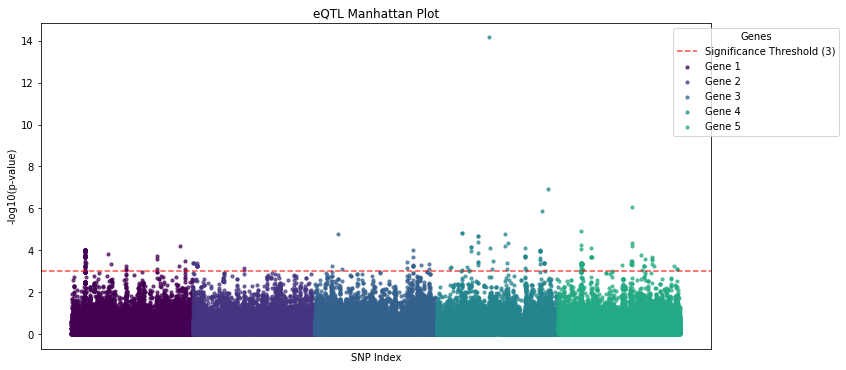

In [12]:
# Manhattan plot of the eQTL data for the first 5 genes

# Convert p-values to -log10(p-values)
log_p_values_df = -np.log10(eqtl_all_df)

num_genes, num_snps = eqtl_all_df.shape

# Gradient
gradient = np.linspace(0, 1, num_genes)
colors = plt.cm.viridis(gradient)

plt.figure(figsize=(12, 6))
for gene_idx in range(5):
    x_positions = np.arange(num_snps) + gene_idx * (num_snps + 1)  # Adjust x-axis positions for each gene
    plt.scatter(
        x_positions,
        log_p_values_df.iloc[gene_idx, :],
        label=f'Gene {gene_idx + 1}',
        s=10,
        alpha=0.7,
        color=colors[gene_idx * 60]
    )

# Threshold line
threshold = 3 
plt.axhline(
    y=threshold,
    color='r', 
    linestyle='--',
    label=f'Significance Threshold ({threshold})',
    alpha=0.7
)

plt.title('eQTL Manhattan Plot')
plt.xlabel('SNP Index')
plt.ylabel('-log10(p-value)')
plt.legend(title='Genes', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.xticks([])
plt.show()

In [13]:
# Number of significant results (threshold of 0.05)
(eqtl_all_df < 0.05).sum().sum(), eqtl_all_df.shape[0]*eqtl_all_df.shape[1]

(358493, 6960622)

In [14]:
# Retrieve the 'lead variant' of the first gene of the chromosome
first_gene = pd.DataFrame(eqtl_all_df.iloc[0])
first_gene['ENSG00000249263.2'] = pd.to_numeric(first_gene['ENSG00000249263.2'])
lead_variant = first_gene.idxmax()[0]
lead_variant

'rs916239'

In [15]:
# Calculation of linkage disequilibrium (LD) scores
ld_scores = {}

# Iterate through all SNPs in first gene
for snp_id in first_gene.index:
    if snp_id == lead_variant:
        ld_scores[snp_id] = 1
        continue 
    
    # Genotypes for lead variant and current SNP
    lead_variant_genotypes = df_snps_numeric.loc[lead_variant]
    current_snp_genotypes = df_snps_numeric.loc[snp_id]
    
    # Calculate the r^2 value between the SNPs
    r2 = np.corrcoef(lead_variant_genotypes, current_snp_genotypes)[0, 1]**2
    ld_scores[snp_id] = r2
    
# ld_scores
ld_scores

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


{'rs9617528': 0.016301265390607746,
 'rs4911642': 0.008030304762333903,
 'rs7287144': 0.00036884581142587015,
 'rs5748662': 0.00162477739098915,
 'rs5994034': 0.000456685095601888,
 'rs4010554': 0.002584215379265581,
 'rs4010558': 0.002584215379265581,
 'rs3954571': 0.012849356460225805,
 'rs11089179': 0.007204944046797634,
 'rs9604821': 0.006132796095010076,
 'rs2379965': 0.006132796095010076,
 'rs2379981': 0.0035705763284596364,
 'rs4535153': 0.0035705763284596364,
 'rs5747620': 0.006512679941528103,
 'rs17430900': 0.005815062643093698,
 'rs9605903': 0.0008020101865986423,
 'rs5747940': 0.00689656473412773,
 'rs5746647': 0.0028895388401365438,
 'rs16980739': 0.00674760271328614,
 'rs9605927': 0.0006929079118830973,
 'rs5747968': 0.0037108035666110675,
 'rs2236639': 0.025881396463686687,
 'rs5747988': 0.025881396463686687,
 'rs5746664': 0.025881396463686687,
 'rs5747999': 0.004183345829104278,
 'rs2070501': 3.338927068204183e-06,
 'rs11089263': 3.338927068204183e-06,
 'rs2096537': 1.7

In [16]:
# Convert to dataframe
ld_scores_df = pd.DataFrame(list(ld_scores.values()), index=ld_scores.keys())
ld_scores_df.columns = ['R2']
ld_scores_df

,R2
rs9617528,0.016301
rs4911642,0.008030
rs7287144,0.000369
rs5748662,0.001625
rs5994034,0.000457
...,...
rs13056621,0.005075
rs3865766,0.002712
rs3888396,0.000824
rs2238837,0.006018


In [17]:
# Number of SNPs with a LD greater than 0.8
(ld_scores_df > 0.8).sum()

R2    1
dtype: int64

In [18]:
# Number of SNPs with a LD greater than 0.5
(ld_scores_df > 0.5).sum()

R2    3
dtype: int64

In [19]:
# Number of SNPs with a LD greater than 0.1
(ld_scores_df > 0.1).sum()

R2    16
dtype: int64

In [20]:
# Add position column for plotting
first_gene_pos = first_gene.copy()
first_gene_pos['POS'] = pos_column
first_gene_pos

,ENSG00000249263.2,POS
ID,,
rs9617528,0.315635,16061016
rs4911642,0.364252,16504399
rs7287144,0.491937,16886873
rs5748662,0.280728,16892858
rs5994034,0.513451,16894090
...,...,...
rs13056621,0.829597,51181759
rs3865766,0.515000,51186228
rs3888396,0.530562,51211392


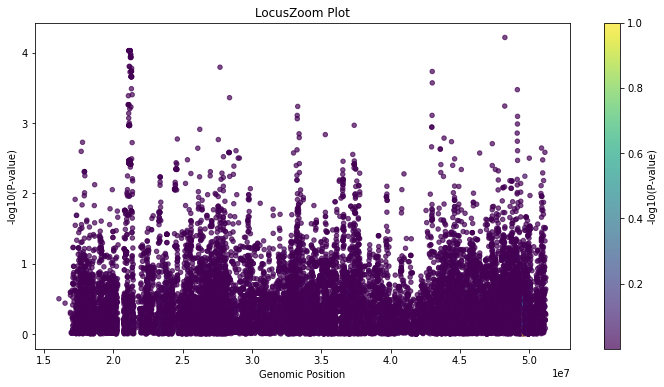

In [21]:
position = first_gene_pos['POS']
log_p_value = -first_gene_pos['ENSG00000249263.2'].apply(np.log10)  
ld_values = ld_scores_df['R2']

plt.figure(figsize=(12, 6))
plt.scatter(position, log_p_value, s=20, c=ld_values, cmap='viridis', alpha=0.7)
plt.xlabel('Genomic Position')
plt.ylabel('-log10(P-value)')
plt.title('LocusZoom Plot')
plt.colorbar(label='-log10(P-value)')

# Show the plot
plt.show()

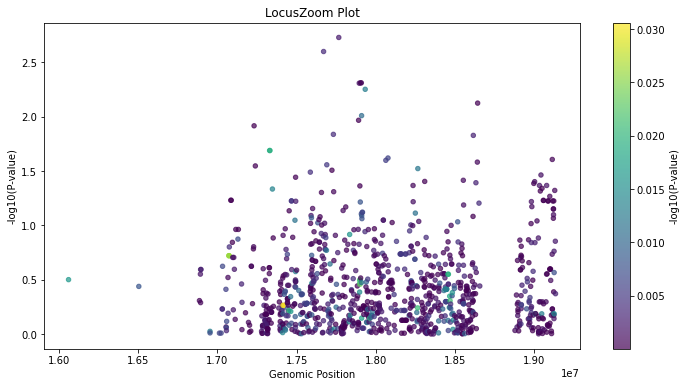

In [22]:
# Only problem with this plot is that there are too many datapoints
# As a result, we only plot the first 1000 genes, to highlight the LD scores and distribution
first_gene_pos = first_gene.copy()
first_gene_pos['POS'] = pos_column[:1000]
position = first_gene_pos['POS']
log_p_value = -first_gene_pos['ENSG00000249263.2'].apply(np.log10)  
ld_values = ld_scores_df['R2']

plt.figure(figsize=(12, 6))
plt.scatter(position, log_p_value, s=20, c=ld_values, cmap='viridis', alpha=0.7)
plt.xlabel('Genomic Position')
plt.ylabel('-log10(P-value)')
plt.title('LocusZoom Plot')
plt.colorbar(label='-log10(P-value)')

# Show the plot
plt.show()